In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

# Mean-squared error

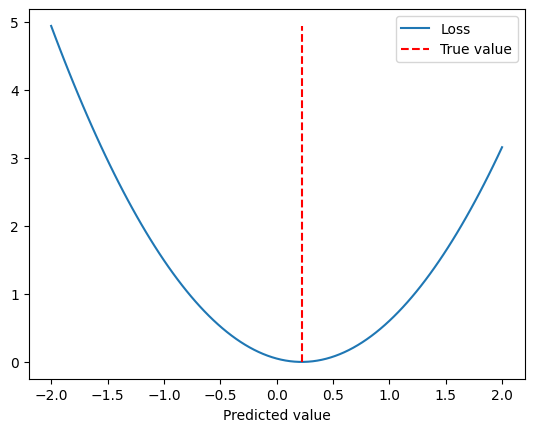

In [10]:
loss_fn_mse = nn.MSELoss()

y_hat = torch.linspace(-2,2,101)
y = torch.tensor(.223)

# compute MSE loss function
L = np.zeros(101)
for i,yy in enumerate(y_hat):
  L[i] = loss_fn_mse(yy, y)

plt.plot(y_hat, L, label = 'Loss')
plt.plot([y,y], [0, np.max(L)], 'r--', label = 'True value')
plt.xlabel('Predicted value')
plt.legend()
plt.show()

# Binary Cross-Entropy

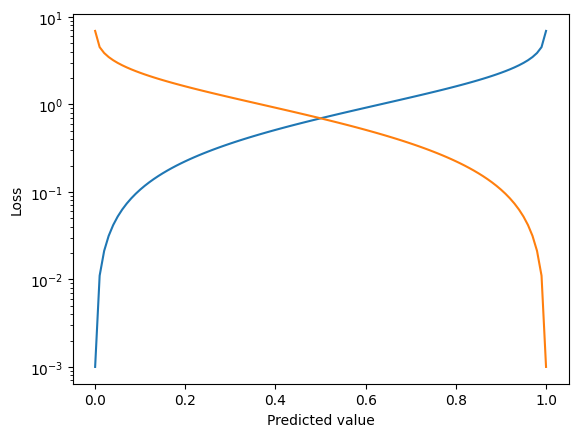

In [16]:
loss_fn_bce = nn.BCELoss()

y_hat = torch.linspace(.001, .999, 101)
y1 = torch.tensor(0.)
y2 = torch.tensor(1.)

L = np.zeros((101, 2))
for i, yy in enumerate(y_hat):
  L[i,0] = loss_fn_bce(yy, y1)
  L[i, 1] = loss_fn_bce(yy, y2)

plt.plot(y_hat, L)
plt.xlabel('Predicted value')
plt.ylabel('Loss')
plt.yscale('log')
plt.show()

In [32]:
y_hat = torch.tensor(2.)

try:
  print(loss_fn_bce(y_hat, y2))
except:
  print('Value from 0 to 1 is needed')

sig = nn.Sigmoid()
print(loss_fn_bce( sig(y_hat), y2 ))

Value from 0 to 1 is needed
tensor(0.1269)


Just BCE comes without built-in sigmoid. Therefore, it's recommended to use BCEwithLogits() instead

In [35]:
loss_fn_bce = nn.BCEWithLogitsLoss()
y_hat = torch.tensor(2.)
print(loss_fn_bce(y_hat, y2))

tensor(0.1269)


# Categorical Cross-Entropy

In [47]:
loss_fn_cce = nn.CrossEntropyLoss()

y_hat = torch.tensor([[1., 4, -5]])

for i in range(3):
  correct_answer = torch.tensor([i])
  this_loss = loss_fn_cce(y_hat, correct_answer).item()
  print('Loss when correct answer is %g: %g' %(i, this_loss))

Loss when correct answer is 0: 3.0487
Loss when correct answer is 1: 0.0487049
Loss when correct answer is 2: 9.04871


# Creating own custom loss function

In [51]:
class myLoss(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x, y):
    loss = torch.abs(x-y)
    return loss
# test
loss_fn = myLoss()
loss_fn(torch.tensor(4), torch.tensor(5.2))

tensor(1.2000)